# Day 34: Dimensionality Reduction for Clustering

Today, we'll see how dimensionality reduction techniques like Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) can be used as powerful tools for enhancing your clustering results. By simplifying complex datasets, we can more easily visualize clusters in 2D and improve their interpretability.

## Topics Covered:

- What is Dimensionality Reduction?
- The Challenge of High-Dimensional Data
- PCA
- t-SNE
- Dimensionality Reduction: PCA vs. t-SNE


## What is Dimensionality Reduction?

Dimensionality reduction is the process of reducing the number of features (or dimensions) in a dataset. Think of it as simplifying a complex spreadsheet with hundreds of columns down to a more manageable number while still retaining the most important information.

## The Challenge of High-Dimensional Data

**Clustering** can be a challenging task in high-dimensional datasets for two key reasons:

- `The "Curse of Dimensionality"`: As the number of features grows, the data becomes extremely sparse. This makes it difficult for many algorithms to find meaningful patterns, as every data point seems to be equally far from every other point.

- `Visualization`: We can't visualize data with more than three dimensions. By reducing the dimensions to two or three, we can create scatter plots that reveal hidden patterns, clusters, or relationships in the data.

- `Efficiency and Speed`: Less data means faster training times and reduced computational costs for machine learning models.

- `Noise Reduction`: By focusing on the most relevant features and discarding redundant or noisy ones, dimensionality reduction can improve the performance of your models.

`Analogy: The Best Angle for a Photo`
 - Imagine you have a 3D object and you want to take a 2D photograph that captures its most important details.

 - If you take a picture from a bad angle, the photo might look flat and you'll lose a lot of information.

 - Dimensionality reduction is like finding the perfect angle to take the photo. It finds the view that shows the most variation and captures the key characteristics of the object in a lower-dimensional form, giving you the best possible summar

## PCA(Principal Component Analysis): A Mathematical Approach to Dimension Reduction

PCA works by transforming the original features into a new set of orthogonal (uncorrelated) features called Principal Components (PCs). The first PC captures the most variance in the data, the second PC captures the next most, and so on.

### How it helps:

- `Reduces Noise`: By focusing on the principal components that capture the most variance, PCA effectively discards dimensions that contain noise or redundant information. This helps the clustering algorithm find more coherent clusters.

- `Improves Efficiency`: With fewer features, clustering algorithms can run much faster, which is particularly important for large datasets like the one we've been working with.

`Analogy: The Executive Summary`
 - Imagine your data is a massive, detailed report.

 - Clustering on the raw data is like trying to find patterns by reading every single word of the report. It's time-consuming and you might miss the big picture.

 - Using PCA first is like creating an executive summary that captures all the most important points. You can then quickly find patterns and key themes in the summary, which is much more efficient and effective.

Original data shape: (100, 7)
PCA-transformed data shape: (100, 2)

Variance captured by each component:
[0.19765843 0.1840949 ]
Total variance captured: 38.18%


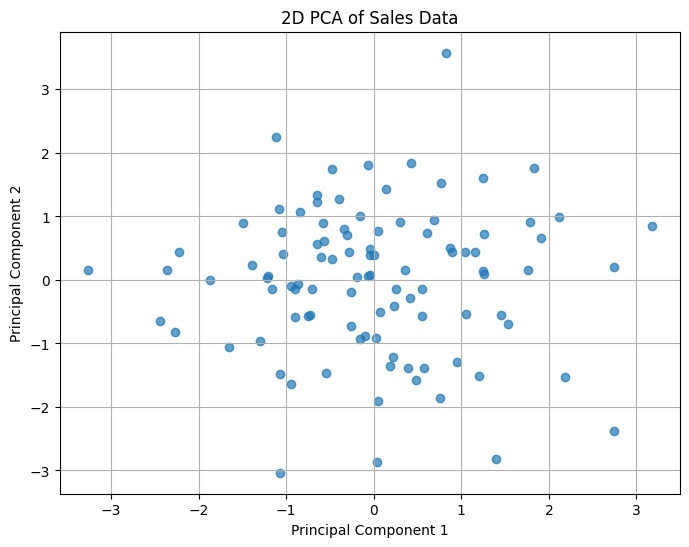

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Create a simulated sales dataset
np.random.seed(42)
n_products = 100

data = {
    'website_visits': np.random.normal(5000, 1000, n_products),
    'average_price': np.random.normal(50, 10, n_products) + np.random.normal(0, 1, n_products),
    'conversion_rate': np.random.normal(0.05, 0.01, n_products) - np.random.normal(0, 0.005, n_products),
    'avg_delivery_charges': np.random.normal(5, 2, n_products),
    'size': np.random.normal(20, 5, n_products),
    'weight': np.random.normal(15, 4, n_products) + np.random.normal(0, 2, n_products),
    'avg_ad_spend': np.random.normal(200, 50, n_products)
}

df = pd.DataFrame(data)

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the 2 principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("Original data shape:", df.shape)
print("PCA-transformed data shape:", pca_df.shape)
print("\nVariance captured by each component:")
print(pca.explained_variance_ratio_)
print(f"Total variance captured: {pca.explained_variance_ratio_.sum():.2%}")

# 4. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('2D PCA of Sales Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## t-SNE: Visualizing Local Structure

While PCA is a linear technique that preserves global structure, t-SNE is a non-linear algorithm that is excellent at visualizing intricate, local clusters. It does this by converting the high-dimensional Euclidean distances between points into conditional probabilities that represent similarities.

### When to use t-SNE:

- `After Clustering`: Once you've run a clustering algorithm on your full dataset (or a PCA-reduced version), you can use t-SNE to visualize the final clusters in 2D. The plot will show you if the clusters are well-separated and if there are any outliers.

- `Exploratory Data Analysis`: You can also use t-SNE early in your analysis to see if your data naturally forms any clusters before you even choose a clustering algorithm.

`Analogy: The Social Network Map`

- PCA is like a map that shows which continents and countries are closest to each other. It gives you a global view.

- t-SNE is like a map that shows which individual friends are hanging out in the same group. It reveals the intricate, local relationships and sub-groups that you can then identify as clusters.

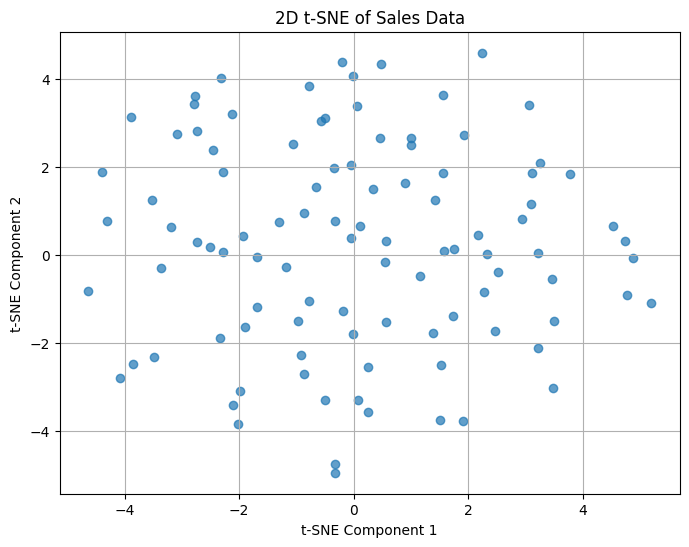

In [3]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

# Create a DataFrame for the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['tsne_1', 'tsne_2'])

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['tsne_1'], tsne_df['tsne_2'], alpha=0.7)
plt.title('2D t-SNE of Sales Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

## Dimensionality Reduction: PCA vs. t-SNE

| Technique | When to Use It | Pros | Cons |
| :--- | :--- | :--- | :--- |
| **PCA** | **Preprocessing for Clustering** and general-purpose dimensionality reduction | Very fast and scalable; preserves global structure and helps remove noise. | Doesn't always create visually distinct clusters in 2D plots. |
| **t-SNE** | **Visualization of Clusters** | Excellent at revealing well-defined, intricate clusters; superb for visualizing complex, high-dimensional data. | Not a preprocessing step; very slow for large datasets; does not preserve global distances. |